In [96]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
%matplotlib inline

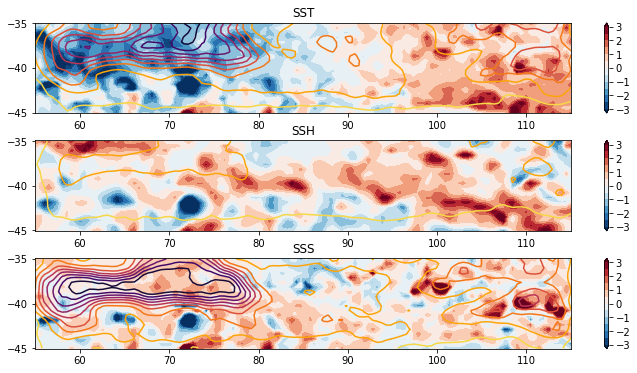

In [90]:
ds = xr.open_dataset("../../data/ig_SIO_1998-02-15_cnn.nc")
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.3)
for v, var in enumerate(["SST", "SSH", "SSS"]):
    plt.subplot(3, 1, v + 1)
    plt.contourf(ds["lon"], ds["lat"], ds[var], np.arange(-3, 3.5, 0.5), cmap="RdBu_r", vmin=-3, vmax=3, extend="both")
    plt.colorbar()
    plt.contour(ds["lon"], ds["lat"], gaussian_filter(ds["d" + var], 1), np.arange(0, 2, 0.2), vmin=0, vmax=2, cmap="inferno_r")
    #plt.colorbar()
    plt.gca().axis("equal")
    plt.title(var)
plt.savefig("sio_ig.pdf", bbox_inches="tight")

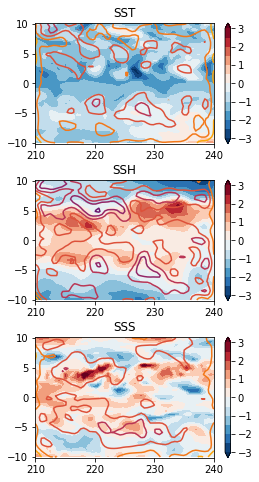

In [92]:
ds = xr.open_dataset("../../data/ig_EPO_1998-06-10_cnn.nc")
plt.figure(figsize=(4, 8))
plt.subplots_adjust(hspace=0.3)
for v, var in enumerate(["SST", "SSH", "SSS"]):
    plt.subplot(3, 1, v + 1)
    plt.contourf(ds["lon"], ds["lat"], ds[var], np.arange(-3, 3.5, 0.5), cmap="RdBu_r", vmin=-3, vmax=3, extend="both")
    plt.colorbar()
    plt.contour(ds["lon"], ds["lat"], gaussian_filter(ds["d" + var], 1), np.arange(0, 1.1, 0.1), vmin=0, vmax=1, cmap="inferno_r")
    plt.gca().axis("equal")

    #plt.colorbar()
    plt.title(var)
plt.savefig("epo_ig.pdf", bbox_inches="tight")

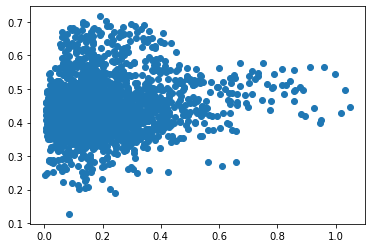

In [100]:
plt.scatter(gaussian_gradient_magnitude(ds["SSH"].values, 1).ravel(), gaussian_filter(ds["dSSH"].values, 1).ravel())

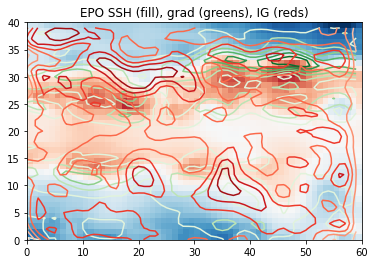

In [109]:
plt.pcolormesh(ds["SSH"], cmap="RdBu_r", vmin=-3, vmax=3)
plt.contour(gaussian_gradient_magnitude(ds["SSH"].values, 1), cmap="Greens")
plt.contour(gaussian_filter(ds["dSSH"].values, 1), cmap="Reds")
plt.title("EPO SSH (fill), grad (greens), IG (reds)")
plt.savefig("epo_grad_ig.png", dpi=200, bbox_inches="tight")

In [110]:
gaussian_gradient_magnitude(ds["SSH"].values, 1).shape

(40, 60)

In [111]:
ds["SSH"].shape

(40, 60)

ValueError: not enough values to unpack (expected 2, got 0)

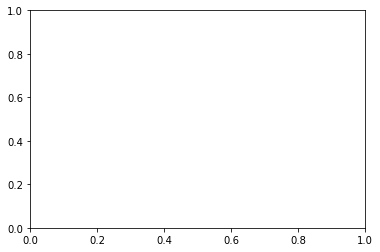

In [121]:
plt.pcolormesh(ds[["dSSH", "dSST", "dSSS"]].values)
plt.colorbar()

In [114]:
ds_sum = ds["dSSH"] + ds["dSST"] + ds["dSSS"]

In [116]:
ds_sum.min()

<xarray.DataArray ()>
array(0.12459652)

In [125]:
ds[["dSSH", "dSST", "dSSS"]]

<xarray.Dataset>
Dimensions:  (x: 40, y: 60)
Coordinates:
    lon      (x, y) float64 210.0 210.5 211.0 211.5 ... 238.5 239.0 239.5 240.0
    lat      (x, y) float64 -10.0 -10.0 -10.0 -10.0 ... 10.0 10.0 10.0 10.0
Dimensions without coordinates: x, y
Data variables:
    dSSH     (x, y) float64 0.04305 0.1451 0.2036 0.28 ... 0.4391 0.3361 0.1443
    dSST     (x, y) float64 0.03776 0.09542 0.155 ... 0.2221 0.2393 0.1228
    dSSS     (x, y) float64 0.04379 0.09251 0.1695 ... 0.2926 0.2202 0.2329
Attributes:
    description:  Integrated Gradients, EPO, 1998-06-10